## Imports

In [2]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function
from sklearn.linear_model import LinearRegression

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [3]:
diabetPath = './DiabetesDataNormalized.txt'


## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [8]:

# Create a function that takes n and p as parameters and returns an estimate of the betas
def estimate_betas(n, p, beta_true, sigma):
    """

    Parameters:
    n (int): number of observations
    p (int): number of features
    true_betas (array): array of ture betas

    Returns:
    true_betas: the estimated betas

   """
    # Create a feature matrix either using np.random.normal or np.rand.randn
    X_rand = np.zeros((n,p))
    for i,beta in enumerate(beta_true):
        x_tmp = np.random.normal(0, scale=10, size=n)
        X_rand[:,i] = x_tmp
    
    # Create true betas
    y_true = X_rand.dot(beta_true) + np.random.normal(0, scale=sigma, size=n)

    # Estimate of beta
    beta_est = LinearRegression().fit(X_rand,y_true).coef_
    
    return beta_est

# define true betas, n and p, and sigma
sigma = 1
beta_true = [1,2,3]
n = 10
p = len(beta_true)
beta = estimate_betas(n, p, beta_true, sigma)
print (f'Estimated betas:{beta}')

Estimated betas:[0.91471692 2.00814508 2.94953334]


>> (v) Repeat steps (iii)-(iv) 100 times.

In [9]:
# call the method you just created 100 times and save the estimated betas
def beta_matrix(sigma):
    betas = np.zeros((100,p))
    for i in range(0,100):
        betas[i] = estimate_betas(n, p, beta_true, sigma)
    return betas

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

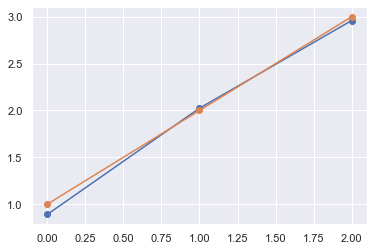

In [18]:
plt.plot(betas.mean(axis=0), marker='o')
plt.plot(beta_true, marker='o')

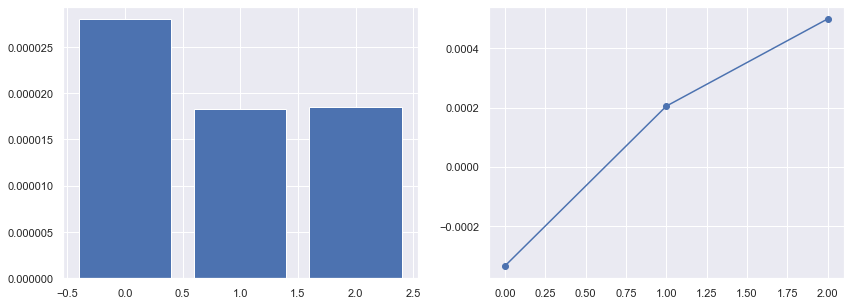

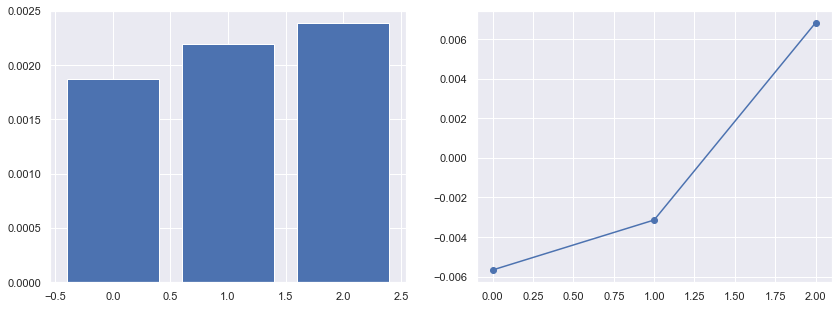

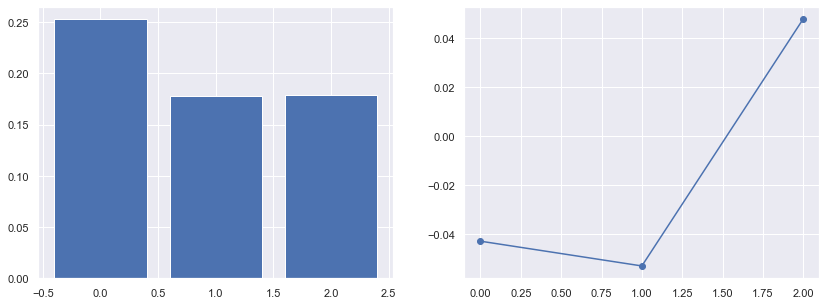

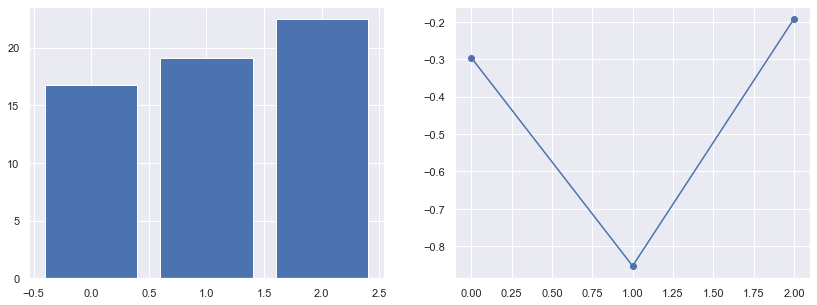

In [30]:
# Investigate the betas that you have estimated from experiments with 
# different noise levels
# plt.bars(np.var())
for sigma_tmp in [0.1,1,10,100]:
    betas = beta_matrix(sigma_tmp)
    f,ax = plt.subplots(1,2,figsize=(14,5))
    ax[0].bar(x=[tmp for tmp in range(len(beta.T))],height=[np.var(col) for col in betas.T])
    ax[1].plot(betas.mean(axis=0)-beta_true, marker='o')
    plt.show()